# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
#from sklearn import datasets



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("..", "output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-10, 10)
lng_range = (-5, 5)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

146

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

unit = "imperial"

query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

print(query_url)



http://api.openweathermap.org/data/2.5/weather?appid=03807ab851ea52cddd7b52d74fcab014&units=imperial&q=


In [4]:
#number of Cities
x = 0
set = 1

#Variables
temp = []
humd = []
cloud = []
wind_spd = []
lat = []
lon = []
city_ = []
city_no = []
country = []
max_t = []
date = []


print('''
-----------------------------
Data Retrieval Begin
-----------------------------
''')


for city in cities:
    try:
        
        city_data = (requests.get(query_url + city)).json()
        city_.append(city_data["name"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])        
        lat.append(city_data["coord"]["lat"])
        lon.append(city_data["coord"]["lon"])        
        temp.append(city_data["main"]["temp"])
        max_t.append(city_data["main"]["temp_max"])
        humd.append(city_data["main"]["humidity"])
        cloud.append(city_data["clouds"]["all"])
        wind_spd.append(city_data["wind"]["speed"])

        
        if x == 50:
            x = 1
            set += 1
            time.sleep(30)
            
        else:
            x += 1
        
        print(f"Processing record {x} of set {set} | {city}.")
 
    except KeyError:
        print("not found")
        
print('''
-----------------------------
     Data Retrieval End
-----------------------------''')



-----------------------------

Data Retrieval Begin

-----------------------------
Processing record 1 of set 1 | kpandae.
Processing record 2 of set 1 | atakpame.
Processing record 3 of set 1 | port-gentil.
Processing record 4 of set 1 | mumford.
Processing record 5 of set 1 | takoradi.
Processing record 6 of set 1 | omboue.
Processing record 7 of set 1 | axim.
Processing record 8 of set 1 | daoukro.
Processing record 9 of set 1 | grand-lahou.
Processing record 10 of set 1 | tabou.
Processing record 11 of set 1 | keta.
Processing record 12 of set 1 | bouna.
Processing record 13 of set 1 | teshie.
Processing record 14 of set 1 | gamba.
Processing record 15 of set 1 | yenagoa.
Processing record 16 of set 1 | mayumba.
Processing record 17 of set 1 | jamestown.
Processing record 18 of set 1 | jacqueville.
Processing record 19 of set 1 | bonoua.
Processing record 20 of set 1 | sassandra.
Processing record 21 of set 1 | adzope.
Processing record 22 of set 1 | shama.
Processing record 23 of

ConnectionError: ('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))

In [5]:
len(city_)

109

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# summary_grouped_df = pd.DataFrame({'Mean Tumor Volume (mm3)': tumor_mean, 'Median Tumor Volume (mm3)': tumor_median, 'Variance Tumor Volume (mm3)': tumor_var,
#                                    'Standard Deviation Tumor Volume (mm3)': tumor_std, 'SEM Tumor Volume (mm3)': tumor_sem})


# summary_grouped_df = pd.DataFrame({"City": city_, "Lat": lat, "Lng": lon, "Max Temp": max_t, "Humidity": humd, "Cloudiness": cloud, "Wind Speed": wind_spd, "date": date})

city_dict = {
    "City": city_, 
    "Country": country, 
    "Date": date,
    "Lat": lat, 
    "Lng": lon, 
    "Max Temp": max_t, 
    "Humidity": humd, 
    "Cloudiness": cloud, 
    "Wind Speed": wind_spd  
}

city_data_df = pd.DataFrame(city_dict)

city_data_df.count()

City          109
Country       109
Date          109
Lat           109
Lng           109
Max Temp      109
Humidity      109
Cloudiness    109
Wind Speed    109
dtype: int64

In [65]:
#date

In [8]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kpandae,GH,1612147503,8.4689,-0.0113,77.40,36,31,4.43
1,Atakpamé,TG,1612147503,7.5333,1.1333,74.61,81,2,3.38
2,Port-Gentil,GA,1612147504,-0.7193,8.7815,80.60,76,77,4.59
3,Mumford,GH,1612147504,5.2618,-0.7590,79.63,87,41,9.80
4,Takoradze,GH,1612147498,4.8845,-1.7554,78.40,88,8,8.63


In [64]:
#city_data_df.count()

In [10]:
# Save city data into a csv file
city_data_df.to_csv("../3_output_data/cities.csv", index = False)


In [11]:
len(city_data_df)

109

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.

city_data_humidity_df = city_data_df.loc[city_data_df["Humidity"] >= 99]

#d2 = city_data_df.drop(city_data_df.loc[city_data_df["Humidity"]>=93].index, inplace=True)

city_data_humidity_df



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
17,Jacqueville,CI,1612147506,5.2052,-4.4146,80.60,100,40,4.61
18,Bonoua,CI,1612147506,5.2741,-3.5950,80.60,100,40,4.61
49,Dabou,CI,1612147512,5.3256,-4.3769,80.60,100,40,4.61
71,Abengourou,CI,1612147575,6.7297,-3.4964,71.47,99,9,1.81
76,Bibiani,GH,1612147576,6.4635,-2.3194,71.28,99,13,1.43
101,Arrah,IN,1612147639,25.5667,84.6667,42.80,100,90,2.30


In [13]:
len(city_data_humidity_df)

6

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#df.drop(df.loc[df['line_race']==0].index, inplace=True)


In [15]:
len(city_data_humidity_df)


6

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

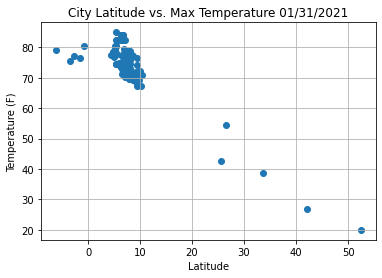

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Max Temperature.png")
# Show plot
plt.show()


## Latitude vs. Humidity Plot

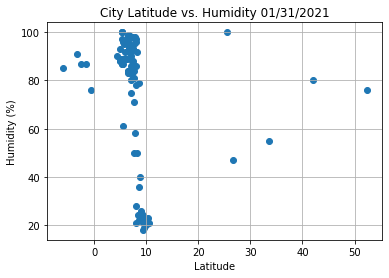

In [81]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Humidity.png")
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

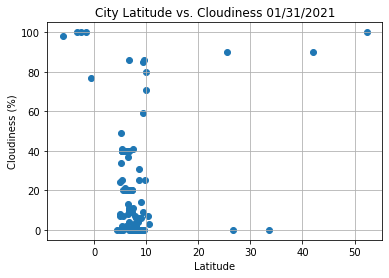

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Cloudiness.png")
# Show plot

## Latitude vs. Wind Speed Plot

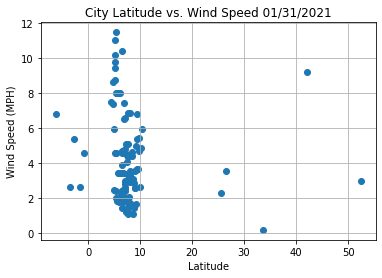

In [19]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("../3_output_data/City Latitude vs. Wind Speed.png")
# Show plot

## Linear Regression

In [75]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]


In [77]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
           
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq
    if {round(st.pearsonr(x, y)[0],2)} <= -.3:
        print(f"Strong Negative Correlation")
    elif {round(st.pearsonr(x, y)[0],2)} > -.3 and {round(st.pearsonr(x, y)[0],2)} < .3:
        print(f"Weak Correlation")
    elif {round(st.pearsonr(x, y)[0],2)} >= .3:
        print(f"Strong Positive Correlation")
# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.93
y = -1.35x + 85.19


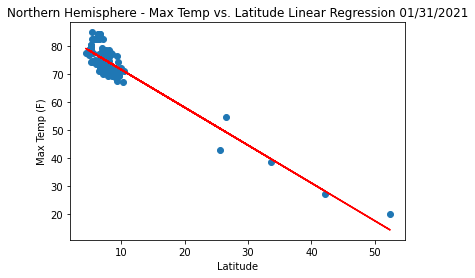

In [90]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
# Call an function #2
annotate(equation, 0, 20)
# Set a title
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')

# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp (F)")
# Save the figure
plt.savefig("../3_output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.03
y = 0.03x + 77.91


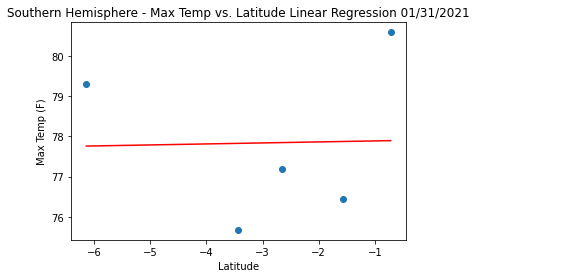

In [91]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Max Temp (F)")
# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.17
y = -0.7x + 78.91


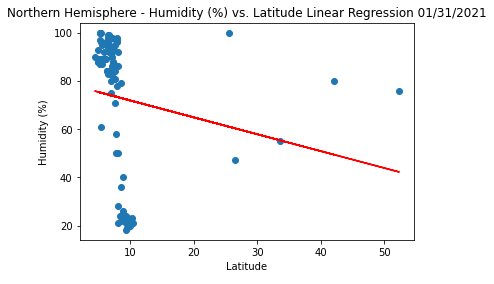

In [92]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("../3_output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.42
y = -1.14x + 81.91


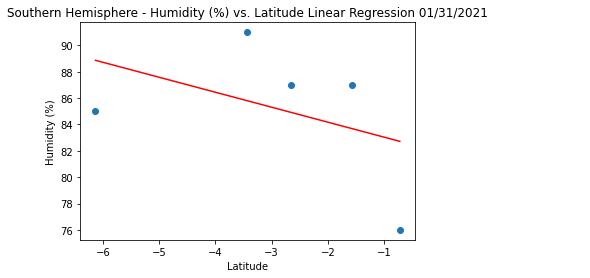

In [93]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.38
y = 1.4x + 6.45


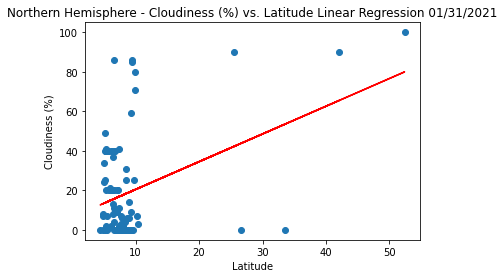

In [97]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("../3_output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.52
y = -2.53x + 87.67


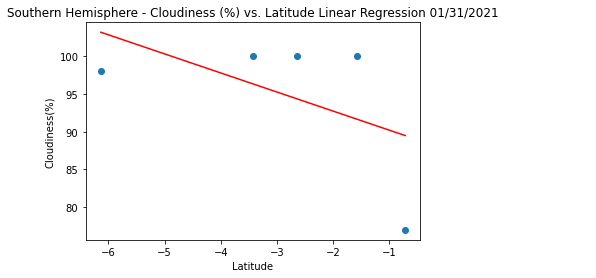

In [98]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
# Call an function #2
annotate(equation, 0, 75)
# Set a title
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Cloudiness(%)")
# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.09
y = -0.04x + 4.56


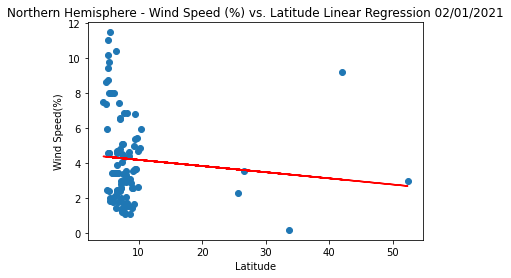

In [101]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title(f'Northern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed(%)")
# Save the figure
plt.savefig("../3_output_data/northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.57
y = -0.49x + 2.99


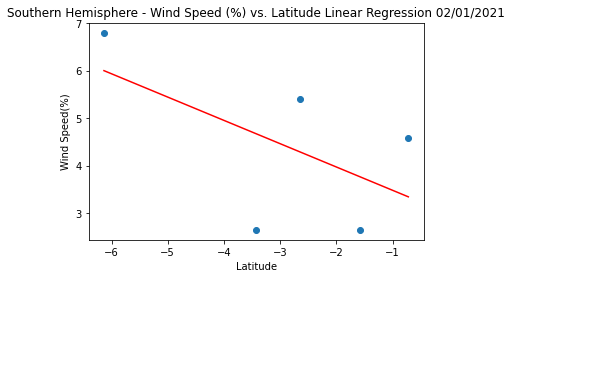

In [102]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title(f'Southern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression {time.strftime("%m/%d/%Y")}')
# Set xlabel
plt.xlabel("Latitude")
# Set ylabel
plt.ylabel("Wind Speed(%)")
# Save the figure
plt.savefig("../3_output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")